## Contoso Database - Exploratory Data Analysis

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
cstring = 'DRIVER=ODBC Driver 17 For SQL Server;Server=LAPTOP-F71OL6MJ;DATABASE=Contoso 100K;Trusted_Connection=yes' 
conn = pyodbc.connect(cstring) 

db_customer = pd.read_sql_query('SELECT * FROM [Contoso 100K].Data.Customer', conn)

<ipython-input-2-a1c4a079c8c0>:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db_customer = pd.read_sql_query('SELECT * FROM [Contoso 100K].Data.Customer', conn)


## CUSTOMER Table EDA

In [3]:
db_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16421 entries, 0 to 16420
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerKey    16421 non-null  int64         
 1   Gender         16421 non-null  object        
 2   Title          16421 non-null  object        
 3   GivenName      16421 non-null  object        
 4   MiddleInitial  16421 non-null  object        
 5   Surname        16421 non-null  object        
 6   StreetAddress  16421 non-null  object        
 7   City           16421 non-null  object        
 8   State          16421 non-null  object        
 9   StateFull      16421 non-null  object        
 10  ZipCode        16421 non-null  object        
 11  Country        16421 non-null  object        
 12  CountryFull    16421 non-null  object        
 13  Birthday       16421 non-null  datetime64[ns]
 14  Age            16421 non-null  int64         
 15  Occupation     1642

In [4]:
db_customer.columns
# Columns name

Index(['CustomerKey', 'Gender', 'Title', 'GivenName', 'MiddleInitial',
       'Surname', 'StreetAddress', 'City', 'State', 'StateFull', 'ZipCode',
       'Country', 'CountryFull', 'Birthday', 'Age', 'Occupation', 'Company',
       'Vehicle', 'Latitude', 'Longitude', 'Continent'],
      dtype='object')

In [5]:
db_customer.shape
# number of rows, attributes

(16421, 21)

In [6]:
db_customer.isnull().sum()

CustomerKey       0
Gender            0
Title             0
GivenName         0
MiddleInitial     0
Surname           0
StreetAddress     0
City              0
State             0
StateFull         0
ZipCode           0
Country           0
CountryFull       0
Birthday          0
Age               0
Occupation        0
Company          14
Vehicle           0
Latitude          0
Longitude         0
Continent         0
dtype: int64

<Axes: >

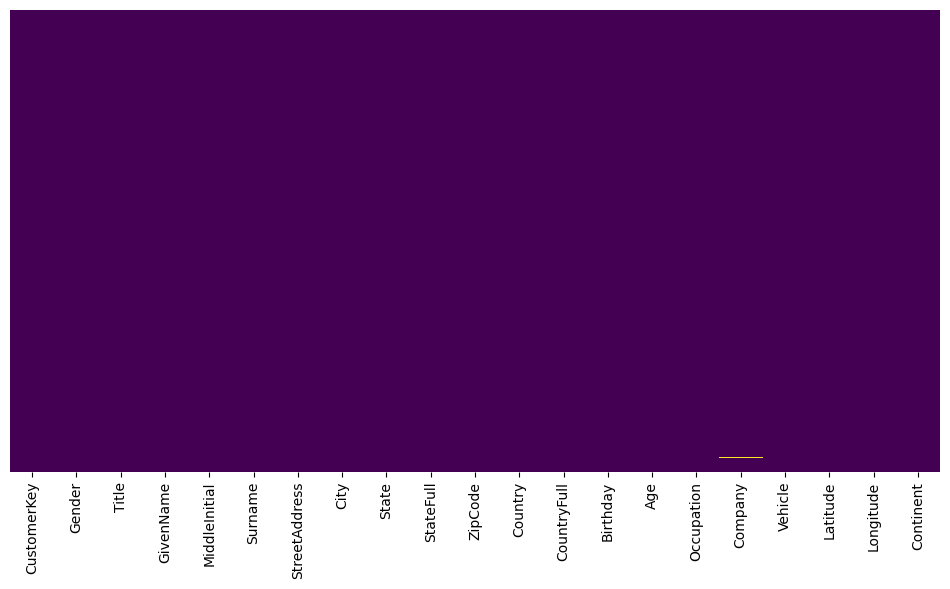

In [7]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.heatmap(db_customer.isnull(), yticklabels=0 ,cbar=0,cmap = 'viridis')

### of all the clients we have, 14 have an occupation that do not need/have Companies

In [8]:
db_customer.nunique()

CustomerKey      16421
Gender               2
Title                4
GivenName         3715
MiddleInitial       30
Surname           7062
StreetAddress    16186
City              8857
State              468
StateFull          513
ZipCode          10080
Country              8
CountryFull          8
Birthday         11873
Age                 67
Occupation        2569
Company           1030
Vehicle           8843
Latitude         16413
Longitude        16418
Continent            3
dtype: int64

In [9]:
db_customer.columns

Index(['CustomerKey', 'Gender', 'Title', 'GivenName', 'MiddleInitial',
       'Surname', 'StreetAddress', 'City', 'State', 'StateFull', 'ZipCode',
       'Country', 'CountryFull', 'Birthday', 'Age', 'Occupation', 'Company',
       'Vehicle', 'Latitude', 'Longitude', 'Continent'],
      dtype='object')

In [10]:
db_age = db_customer[['Age', 'Birthday']]
pd.set_option('display.float_format', lambda x: '%.2f' % x)
db_age.describe()

Age                       Birthday
count 16421.00                          16421
mean     51.83  1968-10-04 11:23:28.562206928
min      19.00            1935-02-03 00:00:00
25%      35.00            1952-03-13 00:00:00
50%      52.00            1968-07-28 00:00:00
75%      68.00            1985-07-03 00:00:00
max      85.00            2002-01-31 00:00:00
std      19.31                            NaN

## Observations:
- most of our customers are in their 50s
- the youngest is 19 years old
- the oldest is 85

In [11]:
db_customer.CountryFull.value_counts()

CountryFull
United States     7359
United Kingdom    2093
Canada            1655
Germany           1597
Australia         1538
Netherlands        781
France             710
Italy              688
Name: count, dtype: int64

## Observations:
- the majority of our customers are from the USA
- Iatly is the state with less customers

In [12]:
country_names = db_customer.CountryFull.value_counts().index
country_values = db_customer.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x258dfb25550>,
 [Text(0.17840420758121436, 1.0854362895708431, 'United States'),
  Text(-1.0969395163060813, -0.08199815587060738, 'United Kingdom'),
  Text(-0.7729288250555172, -0.7826755594742293, 'Canada'),
  Text(-0.17196371808078137, -1.0864752549707857, 'Germany'),
  Text(0.4713179271976162, -0.993911168818493, 'Australia'),
  Text(0.8523229725401376, -0.6953743959050722, 'Netherlands'),
  Text(1.0135588889169078, -0.4274323089069469, 'France'),
  Text(1.0904848881505, -0.14437004092051645, 'Italy')],
 [Text(0.09731138595338965, 0.5920561579477325, '44.81%'),
  Text(-0.5983306452578625, -0.044726266838513114, '12.75%'),
  Text(-0.421597540939373, -0.4269139415313977, '10.08%'),
  Text(-0.09379839168042618, -0.5926228663477012, '9.73%'),
  Text(0.2570825057441543, -0.542133364810087, '9.37%'),
  Text(0.4649034395673477, -0.37929512503913027, '4.76%'),
  Text(0.552850303045586, -0.23314489576742556, '4.32%'),
  Text(0.5948099389911817, -0.07874729504

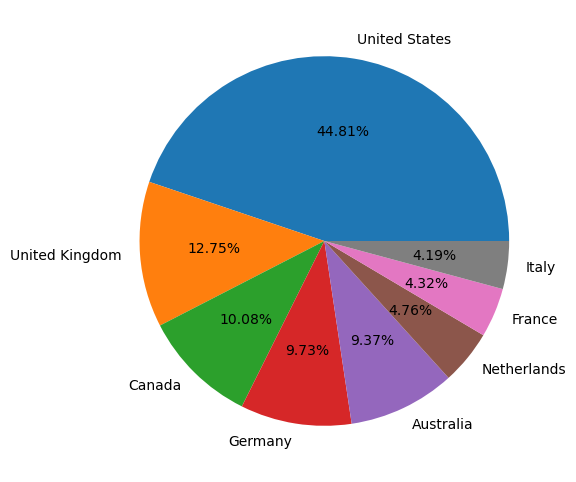

In [13]:
plt.pie(country_values,
        labels=country_names,
        autopct = '%1.2f%%')

In [14]:
gender_names = db_customer.Gender.value_counts().index
gender_values = db_customer.Gender.value_counts().values

([<matplotlib.patches.Wedge at 0x258deceec50>,
 [Text(-0.023883844191113814, 1.0997406794270432, 'Male'),
  Text(0.023883844191113678, -1.0997406794270432, 'Female')],
 [Text(-0.01302755137697117, 0.5998585524147508, '50.69%'),
  Text(0.013027551376971095, -0.5998585524147508, '49.31%')])

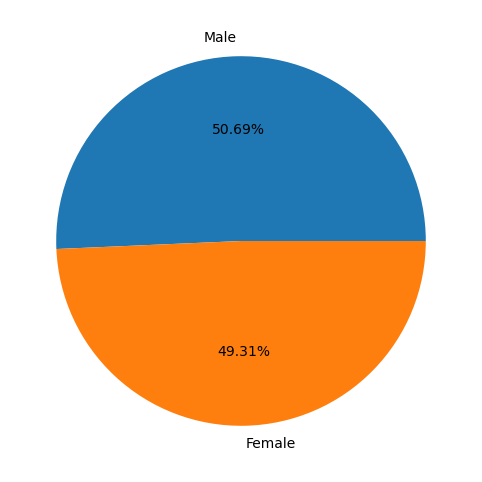

In [15]:
plt.pie(gender_values,
        labels=gender_names,
        autopct = '%1.2f%%')

In [16]:
db_customer.groupby('Occupation').size().reset_index().rename(columns={0:'Count'})

Occupation  Count
0         911 operator      8
1       A & P mechanic      5
2          ABE teacher      8
3          ASE teacher     10
4            ATF agent     13
...                ...    ...
2564  X-ray technician      6
2565        Yardmaster      9
2566   Yoga instructor      7
2567         Zookeeper      8
2568         Zoologist      4

[2569 rows x 2 columns]

In [17]:
job = db_customer.groupby('Occupation').size().reset_index().rename(columns={0:'Count'})
job.nlargest(n=10, columns=['Count'])

Occupation  Count
992                     Funeral director     18
701             Documentation specialist     16
129                Applications engineer     15
491   Computer systems software engineer     15
2366                Television announcer     15
58                    Aerospace engineer     14
297                                  CPA     14
311                     Campaign manager     14
462        Community supervision officer     14
501                            Conductor     14

## Observations:
- we do not have a predominant job that features in most of our customers
- we have almost 17k clients
- the most recurrent job is 'Funeral Director' with 18
- extremely varied set of customers

# STORE Table EDA

In [18]:
db_store = pd.read_sql_query('SELECT * FROM [Contoso 100K].Data.Store', conn)

<ipython-input-18-973caaab680c>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db_store = pd.read_sql_query('SELECT * FROM [Contoso 100K].Data.Store', conn)


In [19]:
db_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       74 non-null     int64  
 1   Store Code     74 non-null     int64  
 2   Country        74 non-null     object 
 3   State          74 non-null     object 
 4   Name           74 non-null     object 
 5   Square Meters  73 non-null     float64
 6   Open Date      74 non-null     object 
 7   Close Date     16 non-null     object 
 8   Status         15 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.3+ KB


In [20]:
db_store.columns

Index(['StoreKey', 'Store Code', 'Country', 'State', 'Name', 'Square Meters',
       'Open Date', 'Close Date', 'Status'],
      dtype='object')

In [21]:
db_store.shape

(74, 9)

In [22]:
db_store.isnull().sum()

StoreKey          0
Store Code        0
Country           0
State             0
Name              0
Square Meters     1
Open Date         0
Close Date       58
Status           59
dtype: int64

In [23]:
db_store

StoreKey  Store Code        Country                         State  \
0         10           1      Australia  Australian Capital Territory   
1         20           2      Australia            Northern Territory   
2         30           3      Australia               South Australia   
3         35           3      Australia               South Australia   
4         40           4      Australia                      Tasmania   
..       ...         ...            ...                           ...   
69       630          63  United States                          Utah   
70       650          65  United States                 Washington DC   
71       660          66  United States                 West Virginia   
72       670          67  United States                       Wyoming   
73    999999          -1         Online                        Online   

                                          Name  Square Meters   Open Date  \
0   Contoso Store Australian Capital Territory         595.00  2008-01-01   
1             Contoso Store Northern Territory         665.00  2008-01-12   
2                Contoso Store South Australia        2000.00  2012-01-07   
3                Contoso Store South Australia        3000.00  2015-12-08   
4                       Contoso Store Tasmania        2000.00  2010-01-01   
..                                         ...            ...         ...   
69                          Contoso Store Utah        2000.00  2008-03-06   
70                 Contoso Store Washington DC        1330.00  2010-01-01   
71                 Contoso Store West Virginia        1785.00  2012-01-01   
72                       Contoso Store Wyoming         840.00  2014-01-01   
73                                Online store            NaN  2010-01-01   

    Close Date        Status  
0         None          None  
1   2016-07-07        Closed  
2   2015-08-08  Restructured  
3         None          None  
4         None          None  
..         ...           ...  
69  2019-11-03          None  
70        None          None  
71        None          None  
72        None          None  
73        None          None  

[74 rows x 9 columns]

## Observation:
- when Close Data is None    ---> the store is still open (status == None)
- when Close Data has a date ---> either Closed or Restructured

In [24]:
db_store.Status.value_counts()

Status
Closed          8
Restructured    7
Name: count, dtype: int64

## Observation:
- 8 shop are closed
- 7 have been restructured
- 1 row refers to ONLINE SHOP
- 74 total ---> 74 - 1 - 8 = 65 shops still open

In [25]:
not_closed = db_store.loc[(db_store['Status'] != 'Closed') & (db_store['State'] != 'Online')]
#subset of store that are not closed

In [26]:
not_closed

StoreKey  Store Code        Country                         State  \
0         10           1      Australia  Australian Capital Territory   
2         30           3      Australia               South Australia   
3         35           3      Australia               South Australia   
4         40           4      Australia                      Tasmania   
5         50           5      Australia                      Victoria   
..       ...         ...            ...                           ...   
68       620          62  United States                  South Dakota   
69       630          63  United States                          Utah   
70       650          65  United States                 Washington DC   
71       660          66  United States                 West Virginia   
72       670          67  United States                       Wyoming   

                                          Name  Square Meters   Open Date  \
0   Contoso Store Australian Capital Territory         595.00  2008-01-01   
2                Contoso Store South Australia        2000.00  2012-01-07   
3                Contoso Store South Australia        3000.00  2015-12-08   
4                       Contoso Store Tasmania        2000.00  2010-01-01   
5                       Contoso Store Victoria        2000.00  2015-12-09   
..                                         ...            ...         ...   
68                  Contoso Store South Dakota        1120.00  2018-06-03   
69                          Contoso Store Utah        2000.00  2008-03-06   
70                 Contoso Store Washington DC        1330.00  2010-01-01   
71                 Contoso Store West Virginia        1785.00  2012-01-01   
72                       Contoso Store Wyoming         840.00  2014-01-01   

    Close Date        Status  
0         None          None  
2   2015-08-08  Restructured  
3         None          None  
4         None          None  
5         None          None  
..         ...           ...  
68        None          None  
69  2019-11-03          None  
70        None          None  
71        None          None  
72        None          None  

[65 rows x 9 columns]

## Observation:
- Utah Store (630) has a value in 'Close Data' but no specification in 'Status'
- We will check later in the table Order, if there was any puschase after the 11/03/2019 date

In [27]:
not_closed.groupby(['Country']).size().reset_index().rename(columns={0:'Number of Shop'})

Country  Number of Shop
0       Australia               6
1          Canada               6
2          France               7
3         Germany               9
4           Italy               2
5     Netherlands               4
6  United Kingdom               6
7   United States              25

In [28]:
not_closed.groupby(['State']).size().reset_index().rename(columns={0:'Number of Shop'})

State  Number of Shop
0                         Alaska               1
1                       Arkansas               1
2                         Armagh               1
3   Australian Capital Territory               1
4                       Ayrshire               1
5                Basse-Normandie               1
6                        Belfast               1
7                         Berlin               1
8                  Blaenau Gwent               1
9                    Connecticut               1
10                         Corse               1
11                      Delaware               1
12                       Drenthe               1
13    Dungannon and South Tyrone               1
14                          Enna               1
15                     Flevoland               1
16                 Franche-Comté               1
17       Freie Hansestadt Bremen               1
18           Freistaat Thüringen               1
19                     Friesland               1
20                     Groningen               1
21                       Hamburg               1
22                        Hawaii               1
23                        Hessen               1
24                         Idaho               1
25                          Iowa               1
26                        Kansas               1
27                    La Réunion               1
28                      Limousin               1
29                         Maine               1
30                    Martinique               1
31                       Mayotte               1
32        Mecklenburg-Vorpommern               2
33                       Montana               1
34                      Nebraska               1
35                        Nevada               1
36                 New Brunswick               3
37                 New Hampshire               1
38                    New Mexico               1
39     Newfoundland and Labrador               1
40                  North Dakota               2
41                    North Down               1
42         Northwest Territories               1
43                       Nunavut               1
44                        Oregon               1
45                        Pesaro               1
46                  Rhode Island               2
47                      Saarland               1
48                Sachsen-Anhalt               1
49               South Australia               2
50                South Carolina               1
51                  South Dakota               1
52                      Tasmania               1
53                          Utah               1
54                      Victoria               1
55                 Washington DC               1
56                 West Virginia               1
57             Western Australia               1
58                       Wyoming               1

# PRODUCT Table EDA

In [29]:
db_product = pd.read_sql_query('SELECT * FROM [Contoso 100K].Data.Product', conn)
# product table

<ipython-input-29-caba80e96144>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db_product = pd.read_sql_query('SELECT * FROM [Contoso 100K].Data.Product', conn)


In [30]:
db_product

ProductKey Product Code                                   Product Name  \
0              1      0101001            Contoso 512MB MP3 Player E51 Silver   
1              2      0101002              Contoso 512MB MP3 Player E51 Blue   
2              3      0101003               Contoso 1G MP3 Player E100 White   
3              4      0101004              Contoso 2G MP3 Player E200 Silver   
4              5      0101005                 Contoso 2G MP3 Player E200 Red   
...          ...          ...                                            ...   
2512        2513      0505026    Contoso Bluetooth Active Headphones L15 Red   
2513        2514      0505027  Contoso Bluetooth Active Headphones L15 White   
2514        2515      0505028             Contoso In-Line Coupler E180 White   
2515        2516      0505029             Contoso In-Line Coupler E180 Black   
2516        2517      0505030            Contoso In-Line Coupler E180 Silver   

      Manufacturer    Brand   Color Weight Unit Measure  Weight  Unit Cost  \
0     Contoso, Ltd  Contoso  Silver              ounces    4.80       6.62   
1     Contoso, Ltd  Contoso    Blue              ounces    4.10       6.62   
2     Contoso, Ltd  Contoso   White              ounces    4.50       7.40   
3     Contoso, Ltd  Contoso  Silver              ounces    4.50      11.00   
4     Contoso, Ltd  Contoso     Red              ounces    2.40      11.00   
...            ...      ...     ...                 ...     ...        ...   
2512  Contoso, Ltd  Contoso     Red              ounces   12.80      43.07   
2513  Contoso, Ltd  Contoso   White              ounces   12.80      43.07   
2514  Contoso, Ltd  Contoso   White              ounces    1.00       1.71   
2515  Contoso, Ltd  Contoso   Black              ounces    1.00       1.71   
2516  Contoso, Ltd  Contoso  Silver              ounces    1.00       1.71   

      Unit Price Subcategory Code              Subcategory Category Code  \
0          12.99             0101                  MP4&MP3            01   
1          12.99             0101                  MP4&MP3            01   
2          14.52             0101                  MP4&MP3            01   
3          21.57             0101                  MP4&MP3            01   
4          21.57             0101                  MP4&MP3            01   
...          ...              ...                      ...           ...   
2512      129.99             0505  Cell phones Accessories            05   
2513      129.99             0505  Cell phones Accessories            05   
2514        3.35             0505  Cell phones Accessories            05   
2515        3.35             0505  Cell phones Accessories            05   
2516        3.35             0505  Cell phones Accessories            05   

         Category  
0           Audio  
1           Audio  
2           Audio  
3           Audio  
4           Audio  
...           ...  
2512  Cell phones  
2513  Cell phones  
2514  Cell phones  
2515  Cell phones  
2516  Cell phones  

[2517 rows x 14 columns]

In [31]:
db_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductKey           2517 non-null   int64  
 1   Product Code         2517 non-null   object 
 2   Product Name         2517 non-null   object 
 3   Manufacturer         2517 non-null   object 
 4   Brand                2517 non-null   object 
 5   Color                2517 non-null   object 
 6   Weight Unit Measure  2295 non-null   object 
 7   Weight               2233 non-null   float64
 8   Unit Cost            2517 non-null   float64
 9   Unit Price           2517 non-null   float64
 10  Subcategory Code     2517 non-null   object 
 11  Subcategory          2517 non-null   object 
 12  Category Code        2517 non-null   object 
 13  Category             2517 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 275.4+ KB


In [32]:
db_product.columns

Index(['ProductKey', 'Product Code', 'Product Name', 'Manufacturer', 'Brand',
       'Color', 'Weight Unit Measure', 'Weight', 'Unit Cost', 'Unit Price',
       'Subcategory Code', 'Subcategory', 'Category Code', 'Category'],
      dtype='object')

In [33]:
db_product.isnull().sum()

ProductKey               0
Product Code             0
Product Name             0
Manufacturer             0
Brand                    0
Color                    0
Weight Unit Measure    222
Weight                 284
Unit Cost                0
Unit Price               0
Subcategory Code         0
Subcategory              0
Category Code            0
Category                 0
dtype: int64

In [34]:
db_product.nunique()
#check unique values in table

ProductKey             2517
Product Code           2517
Product Name           2517
Manufacturer             11
Brand                    15
Color                    17
Weight Unit Measure       3
Weight                  296
Unit Cost               480
Unit Price              426
Subcategory Code         32
Subcategory              32
Category Code             8
Category                  8
dtype: int64

In [35]:
db_product.sort_values(by = 'Unit Price', ascending = 0).head(10)

ProductKey Product Code                                 Product Name  \
1896        1897      0802001   Fabrikam Refrigerator 24.7CuFt X9800 White   
1974        1975      0802079            Litware Refrigerator L1200 Orange   
1932        1933      0802037  Fabrikam Refrigerator 24.7CuFt X9800 Orange   
1938        1939      0802043     Litware Refrigerator 24.7CuFt X980 White   
1944        1945      0802049     Litware Refrigerator 24.7CuFt X980 Brown   
1950        1951      0802055    Litware Refrigerator 24.7CuFt X980 Silver   
1920        1921      0802025    Fabrikam Refrigerator 24.7CuFt X9800 Blue   
1956        1957      0802061     Litware Refrigerator 24.7CuFt X980 Green   
1914        1915      0802019   Fabrikam Refrigerator 24.7CuFt X9800 Green   
1926        1927      0802031    Fabrikam Refrigerator 24.7CuFt X9800 Grey   

        Manufacturer     Brand   Color Weight Unit Measure  Weight  Unit Cost  \
1896  Fabrikam, Inc.  Fabrikam   White              pounds   71.00    1060.22   
1974   Litware, Inc.   Litware  Orange              pounds   36.00    1060.22   
1932  Fabrikam, Inc.  Fabrikam  Orange              pounds   58.00    1060.22   
1938   Litware, Inc.   Litware   White              pounds  175.00    1060.22   
1944   Litware, Inc.   Litware   Brown              pounds   70.00    1060.22   
1950   Litware, Inc.   Litware  Silver              pounds   68.00    1060.22   
1920  Fabrikam, Inc.  Fabrikam    Blue              pounds   75.00    1060.22   
1956   Litware, Inc.   Litware   Green              pounds   71.00    1060.22   
1914  Fabrikam, Inc.  Fabrikam   Green              pounds   38.10    1060.22   
1926  Fabrikam, Inc.  Fabrikam    Grey              pounds  220.00    1060.22   

      Unit Price Subcategory Code    Subcategory Category Code  \
1896     3199.99             0802  Refrigerators            08   
1974     3199.99             0802  Refrigerators            08   
1932     3199.99             0802  Refrigerators            08   
1938     3199.99             0802  Refrigerators            08   
1944     3199.99             0802  Refrigerators            08   
1950     3199.99             0802  Refrigerators            08   
1920     3199.99             0802  Refrigerators            08   
1956     3199.99             0802  Refrigerators            08   
1914     3199.99             0802  Refrigerators            08   
1926     3199.99             0802  Refrigerators            08   

             Category  
1896  Home Appliances  
1974  Home Appliances  
1932  Home Appliances  
1938  Home Appliances  
1944  Home Appliances  
1950  Home Appliances  
1920  Home Appliances  
1956  Home Appliances  
1914  Home Appliances  
1926  Home Appliances

top 10 most expensive products

In [36]:
db_product.groupby('Manufacturer').size().reset_index().rename(columns={0:'Products Count'})

Manufacturer  Products Count
0   A. Datum Corporation             132
1        Adventure Works             192
2           Contoso, Ltd             710
3         Fabrikam, Inc.             267
4          Litware, Inc.             264
5      Northwind Traders              47
6        Proseware, Inc.             244
7       Southridge Video             192
8          Tailspin Toys             144
9      The Phone Company             152
10  Wide World Importers             173

## Observation:
- Contoso not only create products, but also sells and distribute third-party products
- Still, the majority of the products are manufactured by Contoso, Ltd

In [37]:
x_names = db_product.Manufacturer.value_counts().index
y_values = db_product.Manufacturer.value_counts().values

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Manufacturer'>

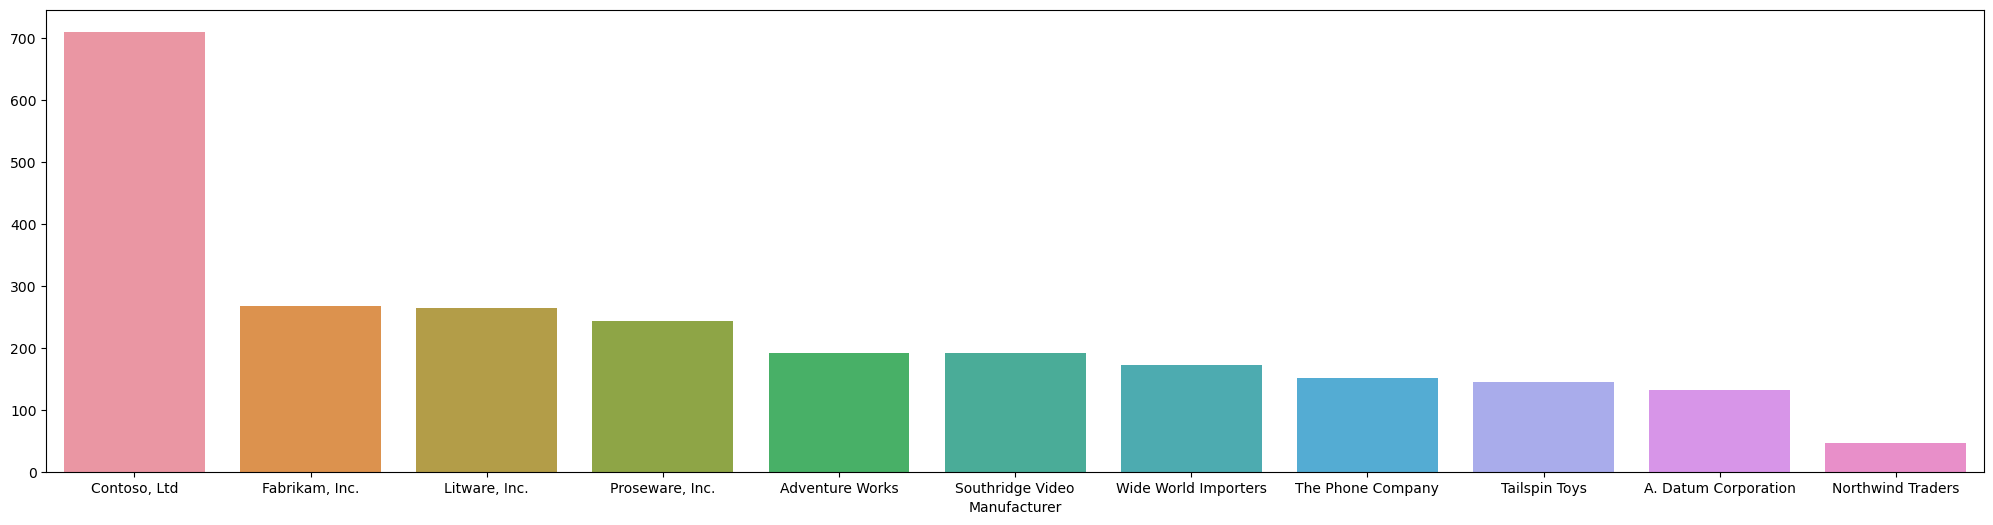

In [38]:
z = db_product.groupby('Manufacturer').size().reset_index().rename(columns={0:'Products Count'})
matplotlib.rcParams['figure.figsize'] = (25,6)
sns.barplot(x = x_names,
            y = y_values,
            data=z)

In [39]:
x_names = db_product.Subcategory.value_counts().index
y_values = db_product.Subcategory.value_counts().values

([<matplotlib.patches.Wedge at 0x258df3f8990>,
 [Text(0.9484838392258326, 0.5571161519175557, 'Computers Accessories'),
  Text(0.10013324597245853, 1.095432943201463, 'Lamps'),
  Text(-0.6598926327679817, 0.8800805151908215, 'Download Games'),
  Text(-1.0376874919588073, 0.3649721482966068, 'Projectors & Screens'),
  Text(-1.0767217707283618, -0.22510048520512227, 'Camcorders'),
  Text(-0.8065453628478021, -0.747987017045555, 'Microwaves'),
  Text(-0.31104656394865604, -1.0551066462949301, 'Smart phones & PDAs '),
  Text(0.2689957572245933, -1.066602682630776, 'Printers, Scanners & Fax'),
  Text(0.7721451915636746, -0.7834486601846329, 'Digital SLR Cameras'),
  Text(1.0618257095602421, -0.2872736718129394, 'Digital Cameras')],
 [Text(0.5173548213959086, 0.3038815374095758, '16.90%'),
  Text(0.054618134166795555, 0.5975088781098887, '13.29%'),
  Text(-0.3599414360552627, 0.4800439173768117, '10.09%'),
  Text(-0.5660113592502585, 0.1990757172526946, '8.66%'),
  Text(-0.5873027840336518, 

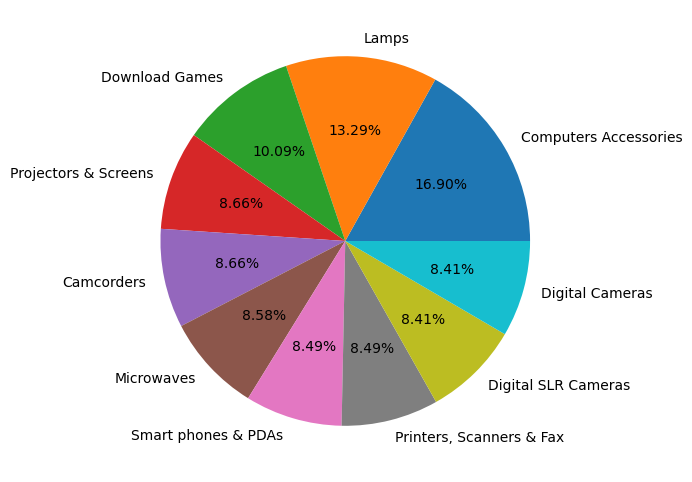

In [40]:
plt.pie(y_values[:10], labels=x_names[:10], autopct = '%1.2f%%')
# piechart of subcategories

In [41]:
x_names = db_product.Category.value_counts().index
y_values = db_product.Category.value_counts().values

([<matplotlib.patches.Wedge at 0x258df7c7450>,
 [Text(0.746390922222175, 0.8080226427671018, 'Home Appliances'),
  Text(-0.8158956827030092, 0.7377765481137163, 'Computers'),
  Text(-0.9728704059354033, -0.5133450820404184, 'Cameras and camcorders '),
  Text(-0.28834629064294764, -1.0615349342685114, 'Cell phones'),
  Text(0.39529401148708043, -1.026519675643118, 'TV and Video'),
  Text(0.8277588715901615, -0.7244413368270634, 'Games and Toys'),
  Text(1.0262727617975234, -0.39593461378425104, 'Audio'),
  Text(1.0930669453423827, -0.1233071490217522, 'Music, Movies and Audio Books')],
 [Text(0.4071223212120954, 0.44073962332751, '26.26%'),
  Text(-0.44503400874709587, 0.40242357169839066, '24.08%'),
  Text(-0.5306565850556745, -0.2800064083856827, '14.78%'),
  Text(-0.15727979489615326, -0.5790190550555516, '11.32%'),
  Text(0.2156149153565893, -0.5599198230780643, '8.82%'),
  Text(0.45150483904917893, -0.39514982008748906, '6.60%'),
  Text(0.559785142798649, -0.21596433479140964, '4.5

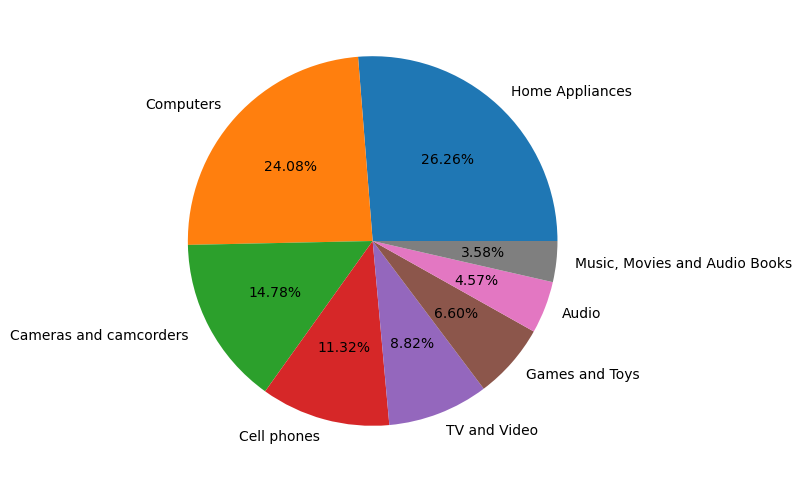

In [42]:
plt.pie(y_values, labels=x_names, autopct = '%1.2f%%')
#piechart category

# ORDER-ORDERROW (Join) EDA

In [43]:
db_order = pd.read_sql_query('select	* from	Data.Orders		as o left join	Data.OrderRows	as r on		o.OrderKey = r.OrderKey order by [Delivery Date]', conn)

<ipython-input-43-8c97cf660b02>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db_order = pd.read_sql_query('select	* from	Data.Orders		as o left join	Data.OrderRows	as r on		o.OrderKey = r.OrderKey order by [Delivery Date]', conn)


In [44]:
db_order.head(25)

OrderKey  CustomerKey  StoreKey  Order Date Delivery Date Currency Code  \
0     138000       242542        90  2010-05-18    2010-05-18           CAD   
1     138001       379002        90  2010-05-18    2010-05-18           CAD   
2     138004      1601425       600  2010-05-18    2010-05-18           USD   
3     138005      1463149       630  2010-05-18    2010-05-18           USD   
4     138000       242542        90  2010-05-18    2010-05-18           CAD   
5     138003      1214274       580  2010-05-18    2010-05-18           USD   
6     138005      1463149       630  2010-05-18    2010-05-18           USD   
7     138000       242542        90  2010-05-18    2010-05-18           CAD   
8     138005      1463149       630  2010-05-18    2010-05-18           USD   
9     138003      1214274       580  2010-05-18    2010-05-18           USD   
10    138005      1463149       630  2010-05-18    2010-05-18           USD   
11    139008       571622       270  2010-05-19    2010-05-19           EUR   
12    139003       793686       290  2010-05-19    2010-05-19           EUR   
13    139005      1186641       420  2010-05-19    2010-05-19           GBP   
14    139002       584463       230  2010-05-19    2010-05-19           EUR   
15    139000       883134       320  2010-05-19    2010-05-19           EUR   
16    139007      1410080       510  2010-05-19    2010-05-19           USD   
17    139002       584463       230  2010-05-19    2010-05-19           EUR   
18    139002       584463       230  2010-05-19    2010-05-19           EUR   
19    139002       584463       230  2010-05-19    2010-05-19           EUR   
20    139000       883134       320  2010-05-19    2010-05-19           EUR   
21    139001       276108        70  2010-05-19    2010-05-19           CAD   
22    139007      1410080       510  2010-05-19    2010-05-19           USD   
23    140003      1308399       450  2010-05-20    2010-05-20           USD   
24    140004      1613129       500  2010-05-20    2010-05-20           USD   

    OrderKey  Line Number  ProductKey  Quantity  Unit Price  Net Price  \
0     138000            0        1411         1      482.40     482.40   
1     138001            0        1652         1      107.99     107.99   
2     138004            0         153         1      375.98     349.66   
3     138005            0        1164         1      288.00     288.00   
4     138000            1        2501         7       42.70      38.85   
5     138003            1         213         2      239.92     211.13   
6     138005            2        2467         4       23.24      19.99   
7     138000            2        1824         7       22.40      22.40   
8     138005            3        2094         2      193.12     179.61   
9     138003            0         958         7      206.40     181.63   
10    138005            1          48         9      112.46     112.46   
11    139008            0        1640         1       13.73      12.77   
12    139003            0        1656         2       95.99      85.43   
13    139005            0        1577         2      131.40     115.63   
14    139002            1         392         3      957.38     947.80   
15    139000            1          27         1      149.93     131.93   
16    139007            1         419         1      922.50     922.50   
17    139002            3        1045         5      940.80     940.80   
18    139002            2         115         4      187.49     187.49   
19    139002            0          85         3       74.99      67.49   
20    139000            0          80        10       30.41      26.46   
21    139001            0        1585         6       13.73      12.36   
22    139007            0         104         5       86.25      86.25   
23    140003            0        1922         2      674.25     606.83   
24    140004            0        1714         2       49.09      45.16   

    Unit Cost  
0      2

In [45]:
db_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208969 entries, 0 to 208968
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderKey       208969 non-null  int64  
 1   CustomerKey    208969 non-null  int64  
 2   StoreKey       208969 non-null  int64  
 3   Order Date     208969 non-null  object 
 4   Delivery Date  208969 non-null  object 
 5   Currency Code  208969 non-null  object 
 6   OrderKey       208969 non-null  int64  
 7   Line Number    208969 non-null  int64  
 8   ProductKey     208969 non-null  int64  
 9   Quantity       208969 non-null  int64  
 10  Unit Price     208969 non-null  float64
 11  Net Price      208969 non-null  float64
 12  Unit Cost      208969 non-null  float64
dtypes: float64(3), int64(7), object(3)
memory usage: 20.7+ MB


In [46]:
db_order.dtypes

OrderKey           int64
CustomerKey        int64
StoreKey           int64
Order Date        object
Delivery Date     object
Currency Code     object
OrderKey           int64
Line Number        int64
ProductKey         int64
Quantity           int64
Unit Price       float64
Net Price        float64
Unit Cost        float64
dtype: object

In [47]:
db_order.shape

(208969, 13)

In [48]:
db_order.select_dtypes(include = 'object').head()

Order Date Delivery Date Currency Code
0  2010-05-18    2010-05-18           CAD
1  2010-05-18    2010-05-18           CAD
2  2010-05-18    2010-05-18           USD
3  2010-05-18    2010-05-18           USD
4  2010-05-18    2010-05-18           CAD

In [49]:
db_order.select_dtypes(include = 'number').head()

OrderKey  CustomerKey  StoreKey  OrderKey  Line Number  ProductKey  \
0    138000       242542        90    138000            0        1411   
1    138001       379002        90    138001            0        1652   
2    138004      1601425       600    138004            0         153   
3    138005      1463149       630    138005            0        1164   
4    138000       242542        90    138000            1        2501   

   Quantity  Unit Price  Net Price  Unit Cost  
0         1      482.40     482.40     221.83  
1         1      107.99     107.99      49.66  
2         1      375.98     349.66     172.90  
3         1      288.00     288.00     146.83  
4         7       42.70      38.85      21.76

In [50]:
db_order.describe() # high statistical overview of data

OrderKey  CustomerKey  StoreKey   OrderKey  Line Number  ProductKey  \
count  208969.00    208969.00 208969.00  208969.00    208969.00   208969.00   
mean  2417636.61   1140475.68 391206.23 2417636.61         1.17     1171.70   
std    926470.03    613535.31 487775.81  926470.03         1.37      686.77   
min    138000.00       301.00     10.00  138000.00         0.00        1.00   
25%   1709000.00    546334.00    390.00 1709000.00         0.00      454.00   
50%   2680019.00   1251211.00    585.00 2680019.00         1.00     1428.00   
75%   3191061.00   1677794.00 999999.00 3191061.00         2.00     1644.00   
max   3715033.00   2099937.00 999999.00 3715033.00         6.00     2517.00   

       Quantity  Unit Price  Net Price  Unit Cost  
count 208969.00   208969.00  208969.00  208969.00  
mean       3.14      342.48     322.12     142.20  
std        2.25      480.33     452.54     176.89  
min        1.00        0.95       0.82       0.48  
25%        1.00       50.40      46.38      23.18  
50%        2.00      206.80     193.60      86.14  
75%        4.00      418.60     392.78     188.64  
max       10.00     6247.50    6247.50    2069.93

In [51]:
db_order.isnull().sum()

OrderKey         0
CustomerKey      0
StoreKey         0
Order Date       0
Delivery Date    0
Currency Code    0
OrderKey         0
Line Number      0
ProductKey       0
Quantity         0
Unit Price       0
Net Price        0
Unit Cost        0
dtype: int64

In [52]:
db_order.nunique()

OrderKey         87053
CustomerKey      16421
StoreKey            74
Order Date        3209
Delivery Date     3271
Currency Code        5
OrderKey         87053
Line Number          7
ProductKey        2517
Quantity            10
Unit Price        1761
Net Price        18422
Unit Cost         1956
dtype: int64

In [53]:
db_order.corr(numeric_only=True) # correlation between numbers

OrderKey  CustomerKey  StoreKey  OrderKey  Line Number  \
OrderKey         1.00        -0.04      0.35      1.00         0.00   
CustomerKey     -0.04         1.00     -0.02     -0.04        -0.01   
StoreKey         0.35        -0.02      1.00      0.35         0.00   
OrderKey         1.00        -0.04      0.35      1.00         0.00   
Line Number      0.00        -0.01      0.00      0.00         1.00   
ProductKey       0.05        -0.01      0.02      0.05         0.00   
Quantity         0.00         0.00      0.00      0.00         0.00   
Unit Price      -0.08         0.01     -0.03     -0.08        -0.00   
Net Price       -0.08         0.01     -0.03     -0.08        -0.00   
Unit Cost       -0.10         0.01     -0.04     -0.10        -0.00   

             ProductKey  Quantity  Unit Price  Net Price  Unit Cost  
OrderKey           0.05      0.00       -0.08      -0.08      -0.10  
CustomerKey       -0.01      0.00        0.01       0.01       0.01  
StoreKey           0.02      0.00       -0.03      -0.03      -0.04  
OrderKey           0.05      0.00       -0.08      -0.08      -0.10  
Line Number        0.00      0.00       -0.00      -0.00      -0.00  
ProductKey         1.00      0.00       -0.25      -0.25      -0.28  
Quantity           0.00      1.00       -0.00      -0.00      -0.00  
Unit Price        -0.25     -0.00        1.00       1.00       0.98  
Net Price         -0.25     -0.00        1.00       1.00       0.98  
Unit Cost         -0.28     -0.00        0.98       0.98       1.00

No Correlation between the columns

### Utah store problem


In [54]:
utah_store = db_order.loc[db_order['StoreKey'] == 630]
utah_store.sort_values(by = 'Order Date', ascending = 0).head(10)

OrderKey  CustomerKey  StoreKey  Order Date Delivery Date  \
194391   3589025      2004449       630  2019-10-29    2019-10-29   
194388   3589025      2004449       630  2019-10-29    2019-10-29   
194384   3589025      2004449       630  2019-10-29    2019-10-29   
194342   3589025      2004449       630  2019-10-29    2019-10-29   
194340   3589025      2004449       630  2019-10-29    2019-10-29   
194323   3589027      2095256       630  2019-10-29    2019-10-29   
194322   3589025      2004449       630  2019-10-29    2019-10-29   
193974   3585011      1712795       630  2019-10-25    2019-10-25   
193740   3582029      1933782       630  2019-10-22    2019-10-22   
193551   3579028      1626664       630  2019-10-19    2019-10-19   

       Currency Code  OrderKey  Line Number  ProductKey  Quantity  Unit Price  \
194391           USD   3589025            3         473         1       59.00   
194388           USD   3589025            4        1572         3       57.99   
194384           USD   3589025            5        2506         1        4.74   
194342           USD   3589025            2        2348         2      635.99   
194340           USD   3589025            1        1589         3        9.99   
194323           USD   3589027            0        1425         1      529.00   
194322           USD   3589025            0        1664         1        8.99   
193974           USD   3585011            0        1654         2      259.99   
193740           USD   3582029            0         370         2      382.95   
193551           USD   3579028            0        1629         4        9.99   

        Net Price  Unit Cost  
194391      59.00      30.08  
194388      57.99      26.67  
194384       4.17       2.42  
194342     566.03     210.72  
194340       9.99       5.09  
194323     476.10     175.27  
194322       8.99       4.13  
193974     239.19      86.14  
193740     344.65     195.24  
193551       8.89       5.09

## Observation:
- the last order that the store made was the 10/29/2019, days before the shop closed
- a data is missing in the store table

In [55]:
top=db_order.groupby('CustomerKey').size().reset_index().rename(columns={0:'Count'})

In [56]:
top.sort_values(by = ['Count'], ascending=False).head(10)

CustomerKey  Count
3970        498401     72
9310       1232357     70
13685      1761910     67
9763       1286602     67
9462       1250029     66
10115      1328055     65
3539        443701     63
8042       1053209     62
3053        382960     62
15566      1994972     61

## Observation:
- Top 10 customers by order made
- Do not confuse with order quantity, or total expense